In [6]:
import json
import pandas as pd
import gzip


def getDF(path):
  df={}
  i = 0
  with open(path,'r',encoding='utf-8') as f:
    for line in f.readlines():
      line_dict =  json.loads(line)
      df[i] = line_dict
      i+=1
  return pd.DataFrame.from_dict(df, orient='index')

meta_df = getDF('meta_Books.json')
#asin, title, brand, categories, price
meta_df = meta_df[['asin', 'title', 'brand', 'category','description']]
meta_df.rename(columns={'asin':'item'}, inplace=True)
print(meta_df.shape[0])

meta_df = meta_df.dropna(subset=['title'])
print(meta_df.shape[0])

2934949


In [7]:
rating_df =  pd.read_csv('ratings_Books.csv')
#add columns, user, item, rating, timestamp
rating_df.columns = ['item','user','rating','timestamp']
#remove rating=3
rating_df = rating_df[rating_df['rating'] != 3]
rating_df['rating'] = rating_df['rating'].apply(lambda x: 1 if x > 3 else 0)
#delete duplicates
rating_df = rating_df.drop_duplicates(subset=['item', 'user'], keep='first')


print(meta_df.head())
print(rating_df.head())

print(meta_df.columns)
print(rating_df.columns)

         item                                              title  \
0  0000092878  Biology Gods Living Creation Third Edition 10 ...   
1  000047715X  Mksap 16 Audio Companion: Medical Knowledge Se...   
2  0000004545  Flex! Discography of North American Punk, Hard...   
3  0000013765         Heavenly Highway Hymns: Shaped-Note Hymnal   
4  0000000116  Georgina Goodman Nelson Womens Size 8.5 Purple...   

              brand                                           category  \
0      Keith Graham                                                 []   
1               Acp  [Books, New, Used & Rental Textbooks, Medicine...   
2  Burkhard Jarisch                 [Books, Arts & Photography, Music]   
3     Stamps/Baxter                 [Books, Arts & Photography, Music]   
4                                                                   []   

                                         description  
0  [It is a biology book with God&apos;s perspect...  
1                                   

In [19]:
import random
random.seed(42)

unique_user_list = rating_df['user'].unique()
sampled_user_list = rating_df['user'].value_counts().index[1000:2000].tolist()
sampled_rating_df = rating_df[rating_df['user'].isin(sampled_user_list)]

In [20]:
sampled_rating_df = pd.merge(sampled_rating_df, meta_df, on='item', how='left')
print(sampled_rating_df.head())
sampled_rating_df = sampled_rating_df.dropna(subset=['title'])
sampled_rating_df = sampled_rating_df.drop_duplicates(subset=['item', 'user'], keep='first')



         item            user  rating   timestamp  \
0  0001712799  A1BNWEJ7RVPLQ1       1  1421193600   
1  0002006448  A1DK5AZMXS1QA3       1  1136505600   
2  0002005263   A9ANMVCEOQ8P7       1  1052265600   
3  0002005263  A1D6PWUMDY9F7V       1  1182816000   
4  0002005263  A2VZ11U5DXM8J5       1  1068681600   

                                                                                  title  \
0                                                                      Great Day for Up   
1  The Carpet Wars: From Kabul to Baghdad A Ten-Year Journey Along Ancient Trade Routes   
2                                                                      The Sinister Pig   
3                                                                      The Sinister Pig   
4                                                                      The Sinister Pig   

                                     brand                          category  \
0             Visit Amazon's Dr Seuss Page  [Books, Ch

unique item num: 222539
interactions: 481455
sparsity: 0.9978365365171947
user interactions: 481.455


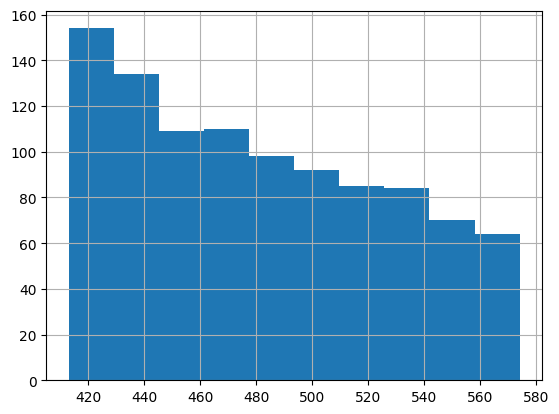

In [21]:
def stat(sampled_rating_df):
    unique_item_list = sampled_rating_df['item'].unique()
    print('unique item num:', len(unique_item_list))

    print('interactions:', len(sampled_rating_df))

    sparsity = 1 - len(sampled_rating_df) / (len(sampled_rating_df['user'].unique()) * len(sampled_rating_df['item'].unique())
    )
    print('sparsity:', sparsity)
    
    user_interactions = sampled_rating_df['user'].value_counts()
    user_interactions.hist()
    print('user interactions:', user_interactions.mean())

stat(sampled_rating_df)

unique item num: 222539
interactions: 481455
sparsity: 0.9978365365171947
user interactions: 481.455


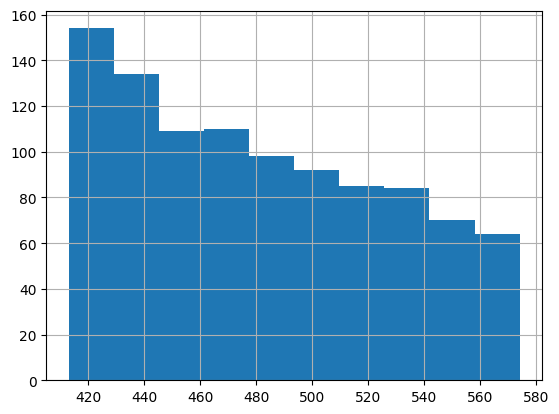

In [22]:

# tail_num = 50
# resampled_rating_df = sampled_rating_df.groupby('user').tail(tail_num)

resampled_rating_df=sampled_rating_df
stat(resampled_rating_df)

In [23]:

resampled_rating_df = resampled_rating_df.rename(columns={'item': 'item_id', 'user': 'user_id'})
resampled_rating_df.to_csv('sampled_long_org.csv', index=False, header=True)

1    43322752
0     3923249
Name: rating, dtype: int64


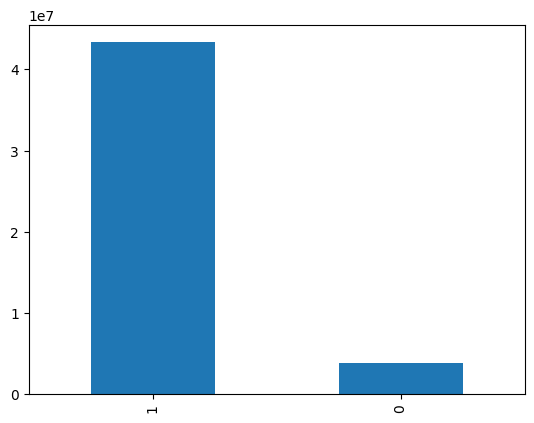

In [24]:

rating_df['rating'].value_counts().plot(kind='bar')
print(rating_df['rating'].value_counts())


sampled_user_list = resampled_rating_df['user_id'].unique()
random.seed(42)
sampled_user_list = random.sample(list(sampled_user_list), 100)
sampled_resampled_rating_df = resampled_rating_df[resampled_rating_df['user_id'].isin(sampled_user_list)]
sampled_resampled_rating_df = sampled_resampled_rating_df.sort_values(by=['user_id', 'timestamp'])

sampled_resampled_rating_df.to_csv('sampled_long.csv', index=False, header=True)
